In [1]:
import numpy as np
import random
import torch
import time
from IPython import display


In [2]:
data_x = torch.randn( 100, 1)
data_x

tensor([[ 0.6466],
        [-0.1302],
        [-1.1333],
        [ 0.2560],
        [-0.2689],
        [ 0.4769],
        [ 0.0179],
        [-1.0752],
        [ 0.6738],
        [ 0.0408],
        [ 0.2010],
        [ 0.1392],
        [-0.0608],
        [ 0.7192],
        [ 0.0667],
        [-1.9942],
        [ 0.4007],
        [ 0.0034],
        [ 0.3579],
        [-0.6985],
        [-0.7581],
        [-0.2986],
        [ 0.2895],
        [ 0.0908],
        [-1.4907],
        [ 0.9074],
        [-0.4928],
        [ 0.4317],
        [ 2.2595],
        [ 1.1913],
        [-0.1240],
        [ 0.9349],
        [ 0.5320],
        [ 0.9069],
        [ 0.5821],
        [ 1.6187],
        [ 0.7636],
        [ 0.1240],
        [-1.1464],
        [ 0.6616],
        [-0.3258],
        [ 0.2482],
        [ 0.3651],
        [-0.1869],
        [-1.8132],
        [-0.0823],
        [ 0.9119],
        [ 1.3214],
        [ 1.0038],
        [-0.4499],
        [ 0.7440],
        [ 1.4760],
        [ 0.

In [3]:
data_y = data_x *5 - 10
data_y

tensor([[ -6.7668],
        [-10.6508],
        [-15.6667],
        [ -8.7202],
        [-11.3444],
        [ -7.6156],
        [ -9.9106],
        [-15.3761],
        [ -6.6308],
        [ -9.7958],
        [ -8.9951],
        [ -9.3040],
        [-10.3042],
        [ -6.4038],
        [ -9.6664],
        [-19.9710],
        [ -7.9965],
        [ -9.9832],
        [ -8.2106],
        [-13.4924],
        [-13.7907],
        [-11.4931],
        [ -8.5527],
        [ -9.5462],
        [-17.4533],
        [ -5.4630],
        [-12.4641],
        [ -7.8415],
        [  1.2973],
        [ -4.0435],
        [-10.6201],
        [ -5.3254],
        [ -7.3401],
        [ -5.4657],
        [ -7.0894],
        [ -1.9065],
        [ -6.1818],
        [ -9.3799],
        [-15.7318],
        [ -6.6920],
        [-11.6290],
        [ -8.7591],
        [ -8.1743],
        [-10.9344],
        [-19.0660],
        [-10.4116],
        [ -5.4406],
        [ -3.3929],
        [ -4.9810],
        [-12.2497],


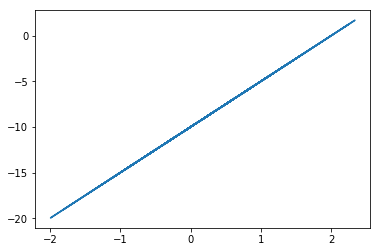

In [4]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_x.numpy(), data_y.numpy())

In [5]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [6]:
model = nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

tensor(98.7682, grad_fn=<MseLossBackward>)
tensor(87.3507, grad_fn=<MseLossBackward>)
tensor(76.7089, grad_fn=<MseLossBackward>)
tensor(66.3117, grad_fn=<MseLossBackward>)
tensor(56.0307, grad_fn=<MseLossBackward>)
tensor(46.0279, grad_fn=<MseLossBackward>)
tensor(36.6575, grad_fn=<MseLossBackward>)
tensor(28.3190, grad_fn=<MseLossBackward>)
tensor(21.3146, grad_fn=<MseLossBackward>)
tensor(15.7582, grad_fn=<MseLossBackward>)


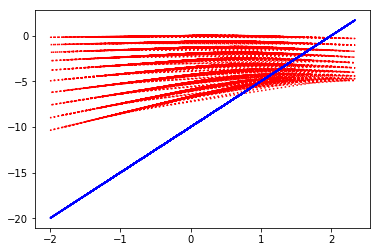

In [7]:
for t in range(1000):
        y_pred = model(data_x)

        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if t % 100 == 0:
            plt.plot(data_x.numpy()
, y_pred.detach().numpy(), 'r:', data_x.numpy(), data_y.numpy(), 'b-')
#             display.clear_output(wait=True)
#             display.display(plt.gcf())
#             time.sleep(0.01)
            print(loss)

In [8]:
def test_model(num):
    t1 = torch.tensor(num).view(-1,1)
    t2 = model(t1)
    return t2

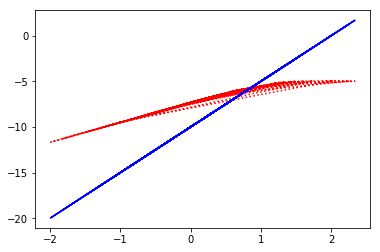

In [9]:
y_pred = model(data_x)
loss = loss_fn(y_pred, data_y)
plt.plot(data_x.numpy() , y_pred.detach().numpy(), 'r:', data_x.numpy(), data_y.numpy(), 'b-')

In [10]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

def plot_durations(y):
    plt.figure(2)
    plt.clf()
    plt.subplot(211)
    plt.plot(y[:,0])
    plt.subplot(212)
    plt.plot(y[:,1])

    plt.pause(0.01)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())



x = np.linspace(-10,10,500)
y = []
for i in range(len(x)):
    y1 = np.cos(i/(3*3.14))
    y2 = np.sin(i/(3*3.14))
    y.append(np.array([y1,y2]))
    plot_durations(np.array(y))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>